<a href="https://colab.research.google.com/github/chillivibe/SogangML/blob/master/ls2_sgd_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a 'set of points.'

In [0]:
n=100

In [20]:
x = torch.ones(n,2) #create tensor of n(row) by 2(col)
x[:,0].uniform_(-1.,1)
#':' means every component in such line
# '_' means replace it, not return
#
x[:5]

tensor([[ 0.4163,  1.0000],
        [-0.2754,  1.0000],
        [-0.2707,  1.0000],
        [-0.8265,  1.0000],
        [ 0.5095,  1.0000]])

In [21]:
a = tensor(3.,2); a #tensor : all the arrays of regular shape
#here 3 and 2 is coefficients
#tensor([3., 2.]) -> would rank 1 tensor, 2dim array is rank 2 tensor

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n) #x@a means matrix product of x by a,
#multiplying numbers together and adding them up

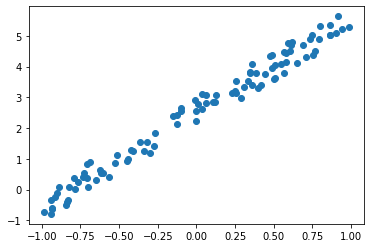

In [23]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error(mse)**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()
#mse : measures the diffence between the prediction line
#and the actual numbers

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [27]:
a = tensor(-1.,1);a

tensor([-1.,  1.])

In [28]:
a.type()

'torch.FloatTensor'

In [29]:
y_hat = x@a
mse(y_hat, y)

tensor(8.3654)

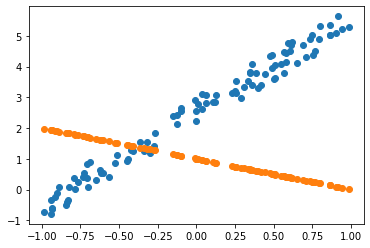

In [30]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

What if we made the intercept a little bit higher? (orange line)

What if we made the intercept a little bit lower? (orange line)

What if we made the gradient a little bit more positive? (blue line)

What if we made the gradient a little bit more negative? (blue line)

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [31]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

.grad() : this will calculate the gradient for us.

* derivative : 순간변화율

* here derivative(=loss.backward()) goes to->a.grad

def update() :
* Calculate y_hat (i.e. our prediction)
* Calculate loss (i.e. our mean squared error)
* From time to time, it will print that out so we can see how we’re going
* Calculate the gradient. In PyTorch, 'calculating the gradient' is done by using a method called backward(). Mean squared error was just a simple standard mathematical function. PyTorch for us keeps track of how it was calculated and lets us calculate the derivative. So if you do a mathematical operation on a tensor in PyTorch, you can call 'backward() to calculate the derivative and the derivative' gets stuck inside an attribute called .grad.
* Take my coefficients and I’m going to subtract from them my gradient (a.sub_()). There is an underscore there because that’s going to do it in-place. It’s going to actually update those coefficients a to subtract the gradients from them. Why do we subtract? Because the gradient tells us if I move the whole thing downwards, the loss goes up. If I move the whole thing upwards, the loss goes down. So I want to do the opposite of the thing that makes it go up. We want our loss to be small. That’s why we subtract.
* lr is our learning rate. All it is is 'the thing that we multiply by the gradient'.


In [34]:
#too high learning rate : cause wrong results, go too wide back and forth
#too low lr : takes too long to find answer

lr = 1e-1
for t in range(100): update()

tensor(8.3654, grad_fn=<MeanBackward0>)
tensor(1.4382, grad_fn=<MeanBackward0>)
tensor(0.3799, grad_fn=<MeanBackward0>)
tensor(0.1419, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)
tensor(0.0743, grad_fn=<MeanBackward0>)
tensor(0.0714, grad_fn=<MeanBackward0>)
tensor(0.0707, grad_fn=<MeanBackward0>)
tensor(0.0706, grad_fn=<MeanBackward0>)
tensor(0.0705, grad_fn=<MeanBackward0>)


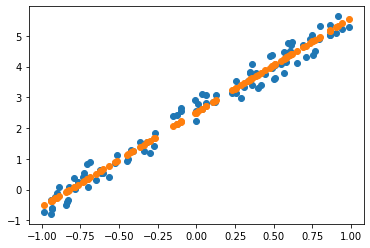

In [47]:
from fastai.basics import *
plt.scatter(x[:,0],y)
with torch.no_grad():
  plt.scatter(x[:,0],x@a)

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

# Q1.couldn't solve the problem under herer using
## **'with torch.no_grad():' function**

ERROR! Session/line number was not unique in database. History logging moved to new session 65


RuntimeError: ignored

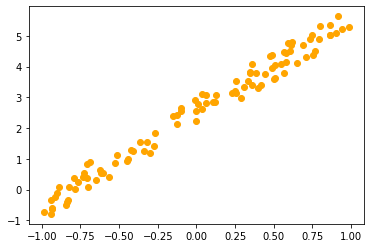

In [64]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate : how much weight we update
- Epoch : 전체 데이터 셋에 대해 한 번 학습을 완료한 상태
- Minibatch : 전체 학습 데이터를 배치 사이즈로 등분하여 각 배치 셋을 순차적으로 수행, 배치보다 빠르고 SGD보다 낮은 오차율
- SGD : 데이터를 한 개씩 추출해서 처리해보고 이를 모든 데이터에 반복하는 것. 오차율이 크다. GD using minibatch.
- Model / Architecture : ex) y=xa
- Parameters
- Loss function : how close you are to the correct answer

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

Underfitting : High Bias
->never git too well.
---
Overfitting : High variance
->it shows good result but wiggles
---
Just Right : good mathematical model